# **Ayudantía 12 - Redes Neuronales**

<hr>

## **Librerías y carga de datos**:

Primero que todo importamos las librerías que utilizaremos a lo largo de la ayudantía.

In [ ]:
# Importamos las librerías de siempre
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Ahora importamos las librerías que nos permitirán hacer nuestras redes neuronales. 

In [ ]:
# Primero importamos tensorflow 
import tensorflow as tf

# Luego importamos keras desde tensorflow
import tensorflow.keras as keras

# Ahora importamos los modelos y las capas necesarias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten

# Importamos el callback que usaremos
from tensorflow.keras.callbacks import EarlyStopping

# Importamos una función para convertir los índices por clase a etiquetas de vectores one-hot
from tensorflow.keras.utils import to_categorical

# Importamos la librería de donde obtendremos la base de datos que utilizaremos
from tensorflow.keras.datasets import fashion_mnist

Teniendo listas las librerías, pasamos a cargar la base de datos.

Los datos que se utilizarán en esta ayudantía se llaman [fashionMNIST](https://keras.io/api/datasets/fashion_mnist/) y los podemos usar desde keras. Los datos contienen distintas imágenes de 28x28 pixeles y en blanco y negro, que se pueden clasificar en 10 classes distintas, estas clases son: `T-shirt/top`, `Trouser`, `Pullover`, `Dress`, `Coat`, `Sandal`, `Sneaker`, `Bag`, `Ankle boot`.

<img src="https://miro.medium.com/max/674/1*XRabSYooUaZsUR044bYdxw.jpeg">

In [ ]:
# Cargamos el dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Veamos las dimensiones del dataset
print(f"\nLa base de datos de entrenamiento tiene {X_train.shape[0]} imágenes de {X_train.shape[1]} x {X_train.shape[2]}")
print(f"\nLa base de datos de testeo tiene {X_test.shape[0]} imágenes de {X_test.shape[1]} x {X_test.shape[2]}")


La base de datos de entrenamiento tiene 60000 imágenes de 28 x 28

La base de datos de testeo tiene 10000 imágenes de 28 x 28


Se puede notar que no hay una base de validación, que es indispensable cuando trabajamos con redes neuronales. Entonces lo que haremos será tomar un porcentaje de nuestra base de entrenamiento para crear esta base.

In [ ]:
# Creamos una base de validación desde la base de entrenamiento

# Tomamos las primeras 5.000 imágenes
X_valid = X_train[:5000]

# Ahora debemos dejar la base de entrenamiento sin esas 5.000 imágenes
X_train = X_train[5000:]

# Hacemos lo mismo para la variable respuesta
y_valid = y_train[:5000]
y_train = y_train[5000:]

Los valores de los pixeles están entre 0 y 255 así que los reescalaremos a valores entre 0 y 1. Para hacer esto solamente debemos dividir por 255.

In [ ]:
# Normalizamos al rango [0, 1] cada pixel de cada imagen de las 3 bases
X_train, X_test, X_valid = X_train / 255, X_test / 255, X_valid / 255

Ahora convertimos la variable respuesta en vectores one-hot:

In [ ]:
# Veamos como se veía "y" antes
print(f"\nLa variable respuesta se veía de así: {y_train[0:10]}")

# Convertimos "y"
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)

# Veamos como se ve "y" ahora
print(f"\nAhora variable respuesta se ve así: \n {y_train[0:10]}")



La variable respuesta se veía de así: [4 0 7 9 9 9 4 4 3 4]

Ahora variable respuesta se ve así: 
 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Lo último que debemos hacer es crear una lista que contenga los nombres de cada clase de ropa, pues los valores de y están en formato numérico y luego de clasificar necesitamos saber que tipo de ropa es la que estamos clasificando. 

Por ejemplo entonces, cuando la red prediga un 3 significa que predijo que la imagen era un `Dress`.

In [ ]:
# Creamos la lista
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Sneaker", "Bag", "Ankle boot"]

Es importante notar que la red recibirá vectores, y nosotros tenemos "matrices" que representan imágenes de 28x28 pixeles, por lo que debemos aplanar cada imágen para que estas sean de 784 (28 x 28). Esto lo haremos en la primera capa de la red neuronal.

Si quisieran hacerlo manualmente en vez de que lo haga la primera capa, pueden usar lo siguiente:

In [ ]:
# Opción alternativa de redimensión de la imagen (no se usará esta vez)
X_train_new = X_train.reshape(X_train.shape[0], 784)
X_test_new = X_test.reshape(X_test.shape[0], 784)
X_valid_new = X_valid.reshape(X_valid.shape[0], 784)

# Mostramos como quedan:
print(f"\n Las nuevas dimensiones de las imágenes son:")
print(f"\n X_train: {X_train_new.shape}")
print(f"\n X_test: {X_test_new.shape}")
print(f"\n X_valid: {X_valid_new.shape}")


 Las nuevas dimensiones de las imágenes son:

 X_train: (55000, 784)

 X_test: (10000, 784)

 X_valid: (5000, 784)


<hr>

## **Red neuronal**:

Ahora que tenemos todo el pre-procesamiento listo, pasamos a crear nuestra primera red neuronal.

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c2/MultiLayerNeuralNetworkBigger_english.png">

In [ ]:
# Primero debemos definir el modelo
model = Sequential()

# Agregamos la primera capa (input layer). A esta debemos agregarle las dimensiones 
model.add(Flatten(input_shape = [28, 28]))

################################################################################################
# Si se prefiere hacer de la manera alternativa, la primera capa sería la siguiente:
# model.add(Input(shape = 784))
# Aunque también podría ser una capa densa con el parámetro input_shape = 784.
# Ojo que si se decide hacer esto, a la hora de entrenar deben usarse las bases redimensionadas
################################################################################################

# Primera hidden layer:
model.add(Dense(300))
model.add(Activation("relu"))

# Segunda hidden layer:
model.add(Dense(100))
model.add(Activation("relu"))

# Capa de output:
# Hacemos la capa de output con 10 neuronas pues nuestro output es de 10 clases.
# Notar también que la función de activación es "softmax" pues son varias clases y estas son excluyentes entre sí.
model.add(Dense(10))
model.add(Activation("softmax"))

# Por último mostramos un resumen del modelo
model.summary() 

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 300)               235500    
                                                                 
 activation_22 (Activation)  (None, 300)               0         
                                                                 
 dense_35 (Dense)            (None, 100)               30100     
                                                                 
 activation_23 (Activation)  (None, 100)               0         
                                                                 
 dense_36 (Dense)            (None, 10)                1010      
                                                                 
 activation_24 (Activation)  (None, 10)              

In [ ]:
# En vez de agregar las capas una por una, podemos entregar una lista de capas cuando creamos el modelo:
model = Sequential([
    Flatten(input_shape = [28, 28]),
    Dense(300, activation = "relu"),
    Dense(100, activation = "relu"),
    Dense(10, activation = "softmax")
])

# Es equivalente a lo anterior, y se nota en el summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 300)               235500    
                                                                 
 dense_38 (Dense)            (None, 100)               30100     
                                                                 
 dense_39 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### **Optimizador SGD**: 

In [ ]:
# Compilamos el modelo utilizand stochastic gradient descent como optimizador y la función de pérdida debe ser categorical crossentropy para este caso de 10 clases distintas
model.compile(loss = "categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

# Definimos el tamaño de cada batch
batch_size = 256

# Definimos la cantidad de épocas de entrenamiento
epochs = 30

# Ajustamos el modelo
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = epochs, batch_size = batch_size)

Epoch 1/30
215/215 [==============================] - 3s 12ms/step - loss: 1.3303 - accuracy: 0.6166 - val_loss: 0.8740 - val_accuracy: 0.7310
Epoch 2/30
215/215 [==============================] - 2s 11ms/step - loss: 0.7798 - accuracy: 0.7489 - val_loss: 0.6895 - val_accuracy: 0.7732
Epoch 3/30
215/215 [==============================] - 2s 11ms/step - loss: 0.6622 - accuracy: 0.7797 - val_loss: 0.6109 - val_accuracy: 0.8006
Epoch 4/30
215/215 [==============================] - 2s 11ms/step - loss: 0.6028 - accuracy: 0.7989 - val_loss: 0.5750 - val_accuracy: 0.8092
Epoch 5/30
215/215 [==============================] - 2s 11ms/step - loss: 0.5659 - accuracy: 0.8097 - val_loss: 0.5368 - val_accuracy: 0.8242
Epoch 6/30
215/215 [==============================] - 2s 11ms/step - loss: 0.5389 - accuracy: 0.8182 - val_loss: 0.5174 - val_accuracy: 0.8286
Epoch 7/30
215/215 [==============================] - 2s 11ms/step - loss: 0.5194 - accuracy: 0.8235 - val_loss: 0.4996 - val_accuracy: 0.8328

### **Optimizador Adam**:

Si queremos usar el optimizador adam, solamente debemos cambiar el parámetro dentro de compile.

In [ ]:
# Compilamos el modelo utilizand adam como optimizador y la función de pérdida debe ser categorical crossentropy para este caso de 10 clases distintas
# model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Definimos el tamaño de cada batch
#batch_size = 256

# Definimos la cantidad de épocas de entrenamiento
#epochs = 30

# Ajustamos el modelo
#history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = epochs, batch_size = batch_size)

### **Desempeño de la red**:

Vamos a crear una función para graficar el accuracy y el loss de la base de entrenamiento y la de validación a medida que avanzan las épocas. Con esto podemos notar si nuestra red funciona bien, o si hay presencia de overfitting.

In [ ]:
# Creamos la función
def plot_history(history):

    # Hacemos una grilla de 2 figuras
    fig, axs = plt.subplots(2, figsize = (10, 10))

    # Graficamos los accuracy de ambas bases
    axs[0].plot(history.history["accuracy"], label = "Accuracy entrenamiento")
    axs[0].plot(history.history["val_accuracy"], label = "Accuracy validación")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc = "lower right")
    axs[0].set_title("Accuracy por épocas")

    # Graficamos los errores de ambas bases
    axs[1].plot(history.history["loss"], label="Error entrenamiento")
    axs[1].plot(history.history["val_loss"], label="Error validación")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Época")
    axs[1].legend(loc = "upper right")
    axs[1].set_title("Error por épocas")

    # Mostramos la figura 
    plt.show()

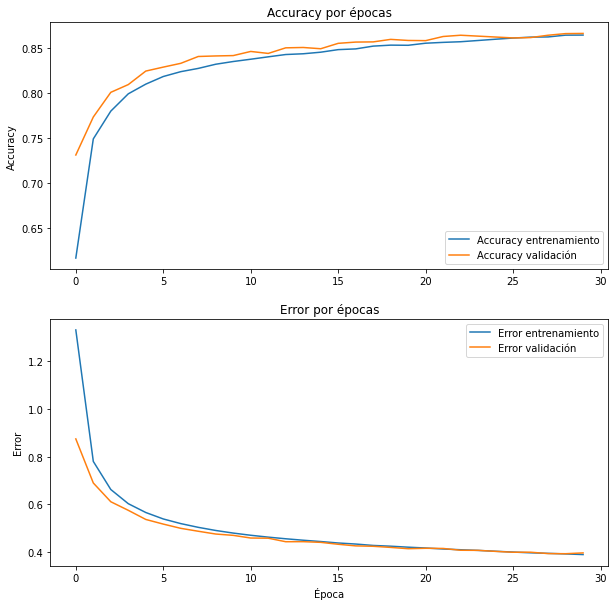

In [ ]:
# Graficamos los resultados de la red
plot_history(history)

En general tuvo un muy buen desempeño, pero veamos si podemos aumentar los accuracy y reducir el loss.

### **Red con más capas**:

In [ ]:
# Creamos una red con 6 capas:

# Primero debemos definir el modelo
model_2 = Sequential()

# Agregamos la primera capa (input layer).
model_2.add(Flatten(input_shape = [28, 28]))

# Primera hidden layer:
model_2.add(Dense(300))
model_2.add(Activation("relu"))

# Segunda hidden layer:
model_2.add(Dense(300))
model_2.add(Activation("relu"))

# Tercera hidden layer:
model_2.add(Dense(300))
model_2.add(Activation("relu"))

# Cuarta hidden layer:
model_2.add(Dense(500))
model_2.add(Activation("relu"))

# Capa de output:
model_2.add(Dense(10))
model_2.add(Activation("softmax"))

# Mostramos un resumen del modelo
model_2.summary() 

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 300)               235500    
                                                                 
 activation_25 (Activation)  (None, 300)               0         
                                                                 
 dense_41 (Dense)            (None, 300)               90300     
                                                                 
 activation_26 (Activation)  (None, 300)               0         
                                                                 
 dense_42 (Dense)            (None, 300)               90300     
                                                                 
 activation_27 (Activation)  (None, 300)             

In [ ]:
# Compilamos el modelo
model_2.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Definimos el tamaño de cada batch
batch_size = 256

# Definimos la cantidad de épocas de entrenamiento
epochs = 30

# Ajustamos el modelo
history_2 = model_2.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = epochs, batch_size = batch_size)

Epoch 1/30
215/215 [==============================] - 6s 24ms/step - loss: 0.5392 - accuracy: 0.8074 - val_loss: 0.4092 - val_accuracy: 0.8502
Epoch 2/30
215/215 [==============================] - 5s 23ms/step - loss: 0.3659 - accuracy: 0.8658 - val_loss: 0.3474 - val_accuracy: 0.8776
Epoch 3/30
215/215 [==============================] - 5s 23ms/step - loss: 0.3246 - accuracy: 0.8802 - val_loss: 0.3283 - val_accuracy: 0.8794
Epoch 4/30
215/215 [==============================] - 5s 23ms/step - loss: 0.3005 - accuracy: 0.8883 - val_loss: 0.3354 - val_accuracy: 0.8758
Epoch 5/30
215/215 [==============================] - 5s 23ms/step - loss: 0.2835 - accuracy: 0.8933 - val_loss: 0.3087 - val_accuracy: 0.8852
Epoch 6/30
215/215 [==============================] - 5s 23ms/step - loss: 0.2636 - accuracy: 0.9012 - val_loss: 0.3098 - val_accuracy: 0.8884
Epoch 7/30
215/215 [==============================] - 5s 23ms/step - loss: 0.2572 - accuracy: 0.9031 - val_loss: 0.2941 - val_accuracy: 0.8934

A simple vista se nota que mejoró la red, pero grafiquemos para ver qué está pasando.

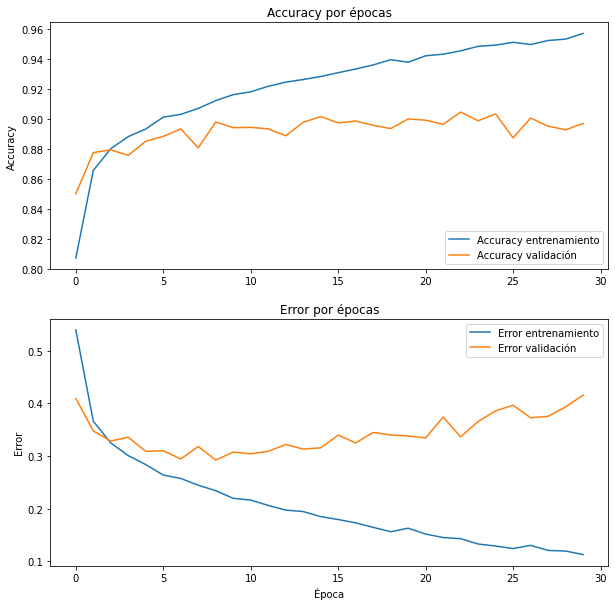

In [ ]:
# Graficamos el segundo modelo
plot_history(history_2)

Se nota que las rectas no están muy juntas, lo que significa que nuestra red no está pudiendo generalizar muy bien. ¿Cómo podríamos arreglar esto sin tener que sacrificar los buenos resultados obtenidos?

## Dropout: 

El dropout consiste básicamente en ir quitando una cierta cantidad de neuronas aleatoriamente con cierta probabilidad en cada iteración.

Por lo tanto ahora aplicaremos capas de dropout a cada capa de la red anterior para ver si mejora.

<img src="https://miro.medium.com/max/1044/1*iWQzxhVlvadk6VAJjsgXgg.png">

In [ ]:
# Creamos una red con 10 capas y con dropout de 0.3 en cada una:

# Primero debemos definir el modelo
model_3 = Sequential()

# Agregamos la primera capa (input layer).
model_3.add(Flatten(input_shape = [28, 28]))

# Primera hidden layer:
model_3.add(Dense(300))
model_3.add(Activation("relu"))
model_3.add(Dropout(0.3))

# Segunda hidden layer:
model_3.add(Dense(300))
model_3.add(Activation("relu"))
model_3.add(Dropout(0.3))

# Tercera hidden layer:
model_3.add(Dense(300))
model_3.add(Activation("relu"))
model_3.add(Dropout(0.3))

# Cuarta hidden layer:
model_3.add(Dense(500))
model_3.add(Activation("relu"))
model_3.add(Dropout(0.3))

# Capa de output:
model_3.add(Dense(10))
model_3.add(Activation("softmax"))

# Mostramos un resumen del modelo
model_3.summary() 

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_45 (Dense)            (None, 300)               235500    
                                                                 
 activation_30 (Activation)  (None, 300)               0         
                                                                 
 dropout_4 (Dropout)         (None, 300)               0         
                                                                 
 dense_46 (Dense)            (None, 300)               90300     
                                                                 
 activation_31 (Activation)  (None, 300)               0         
                                                                 
 dropout_5 (Dropout)         (None, 300)             

In [ ]:
# Compilamos el modelo
model_3.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Definimos el tamaño de cada batch
batch_size = 256

# Definimos la cantidad de épocas de entrenamiento
epochs = 30

# Ajustamos el modelo
history_3 = model_3.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = epochs, batch_size = batch_size)

Epoch 1/30
215/215 [==============================] - 8s 33ms/step - loss: 0.6978 - accuracy: 0.7453 - val_loss: 0.4102 - val_accuracy: 0.8536
Epoch 2/30
215/215 [==============================] - 8s 35ms/step - loss: 0.4537 - accuracy: 0.8382 - val_loss: 0.3602 - val_accuracy: 0.8690
Epoch 3/30
215/215 [==============================] - 6s 29ms/step - loss: 0.4110 - accuracy: 0.8523 - val_loss: 0.3365 - val_accuracy: 0.8754
Epoch 4/30
215/215 [==============================] - 6s 29ms/step - loss: 0.3877 - accuracy: 0.8610 - val_loss: 0.3410 - val_accuracy: 0.8746
Epoch 5/30
215/215 [==============================] - 6s 29ms/step - loss: 0.3669 - accuracy: 0.8675 - val_loss: 0.3242 - val_accuracy: 0.8790
Epoch 6/30
215/215 [==============================] - 9s 41ms/step - loss: 0.3604 - accuracy: 0.8678 - val_loss: 0.3220 - val_accuracy: 0.8798
Epoch 7/30
215/215 [==============================] - 6s 29ms/step - loss: 0.3423 - accuracy: 0.8753 - val_loss: 0.3168 - val_accuracy: 0.8838

Ahora si podemos ver que está bastante mejor.

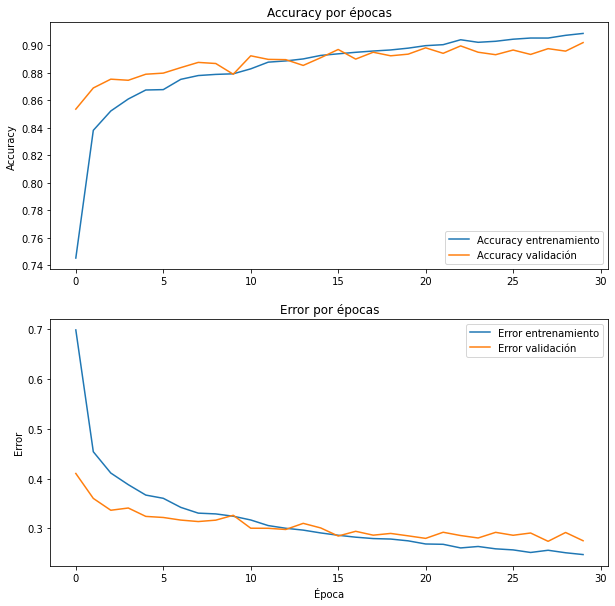

In [ ]:
# Graficamos el segundo modelo
plot_history(history_3)

### **Accuracy del set de testeo**:

In [ ]:
# Mostramos el accuracy que obtuvo nuestra base de testeo (con el primer modelo)
_, accuracy_test = model_2.evaluate(X_test, y_test, verbose = 0)

print(f"\nEl accuracy que se obtuvo en el set de test fue de: %.2f%%\n" % (100 * accuracy_test))


El accuracy que se obtuvo en el set de test fue de: 89.41%



## **Callbacks**:

Generalmente el entrenamiento es muy lento y puede llegar a demorar muchas horas, lo bueno es que keras tiene funciones que nos sirven para guardar checkpoints en el entrenamiento y muchas otras cosas más. Hay muchos de estos, por lo que si quieren ver más pueden ir a [este link](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks).

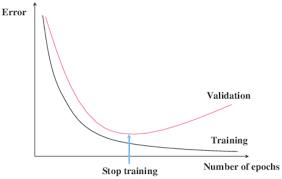

### **Early Stopping**:

Este callback lo usaremos para dejar de entrenar cuando se deje de mejorar por una cierta cantidad de épocas. En el código de abajo lo que hacemos es decirle al entrenamiento que si llevamos 3 épocas sin mejoras, entonces que deje de entrenar.

In [ ]:
# Definimos el EarlyStopping
early_stopping = EarlyStopping(patience = 3, monitor = "val_accuracy", restore_best_weights = True)

# Volvemos a compilar el primer modelo
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Definimos el tamaño de cada batch
batch_size = 256

# Definimos la cantidad de épocas de entrenamiento
epochs = 30

# Ajustamos el modelo
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = epochs, batch_size = batch_size, callbacks = [early_stopping])

Epoch 1/30
215/215 [==============================] - 3s 12ms/step - loss: 0.4323 - accuracy: 0.8491 - val_loss: 0.3861 - val_accuracy: 0.8648
Epoch 2/30
215/215 [==============================] - 2s 11ms/step - loss: 0.3581 - accuracy: 0.8718 - val_loss: 0.3563 - val_accuracy: 0.8724
Epoch 3/30
215/215 [==============================] - 2s 11ms/step - loss: 0.3344 - accuracy: 0.8787 - val_loss: 0.3229 - val_accuracy: 0.8868
Epoch 4/30
215/215 [==============================] - 2s 11ms/step - loss: 0.3068 - accuracy: 0.8884 - val_loss: 0.3763 - val_accuracy: 0.8618
Epoch 5/30
215/215 [==============================] - 2s 11ms/step - loss: 0.2893 - accuracy: 0.8931 - val_loss: 0.3099 - val_accuracy: 0.8870
Epoch 6/30
215/215 [==============================] - 2s 11ms/step - loss: 0.2747 - accuracy: 0.8981 - val_loss: 0.3379 - val_accuracy: 0.8760
Epoch 7/30
215/215 [==============================] - 2s 11ms/step - loss: 0.2621 - accuracy: 0.9026 - val_loss: 0.2969 - val_accuracy: 0.8954

No hizo todas las épocas porque hubo el accuracy en la base de validación dejó de mejorar por 2 épocas. Este es un ejemplo básico, pero utilizando los callbacks podrán ahorrarse mucho tiempo de entrenamiento innecesario.

In [ ]:
# Si quisieramos las métricas obtenidas de un entrenamiento en cada época podríamos hacer lo siguiente
pd.DataFrame({"Loss entrenamiento": history.history["loss"],
              "Loss validación": history.history["val_loss"],
              "Accuracy entrenamiento": history.history["accuracy"],
              "Accuracy validación": history.history["val_accuracy"]})

,Loss entrenamiento,Loss validación,Accuracy entrenamiento,Accuracy validación
0,0.432313,0.386096,0.849127,0.8648
1,0.358096,0.356316,0.871782,0.8724
2,0.334374,0.322937,0.878691,0.8868
3,0.306836,0.376327,0.888400,0.8618
4,0.289340,0.309923,0.893145,0.8870
5,0.274700,0.337918,0.898091,0.8760
6,0.262124,0.296855,0.902636,0.8954
7,0.248978,0.313561,0.907200,0.8872
8,0.236962,0.286346,0.912873,0.8984
9,0.233546,0.296526,0.912836,0.8940


Esperamos que les haya servido, mucho éxito en la tarea y lo que queda de semestre!